In [1]:
import raster
import wireframe
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import transformation
import camera_persp.camera as cam

In [2]:
def extract_polygon(edges):
    poly = []
    verts = []
    counter = 0
    for vec3d in edges:
        p1 = vec3d[0]
        verts.append(p1)
        counter += 1

        if counter == edges.sep():
            poly.append(verts)
            verts = []
            counter = 0
    return poly

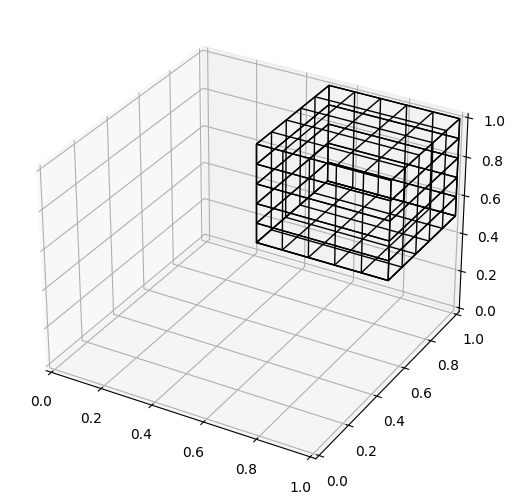

In [3]:
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

edges = wireframe.cube(.5, res=.5)
# edges = transformation.translate_edges(edges, (-.2, -.2, -.2))

poly = extract_polygon(edges)

ax.add_collection3d(Poly3DCollection(poly, linewidths=1, alpha=0, edgecolors="black"))
plt.show()

(1.1408563820557884, 0.20116376126988017, -0.17364817766693033)


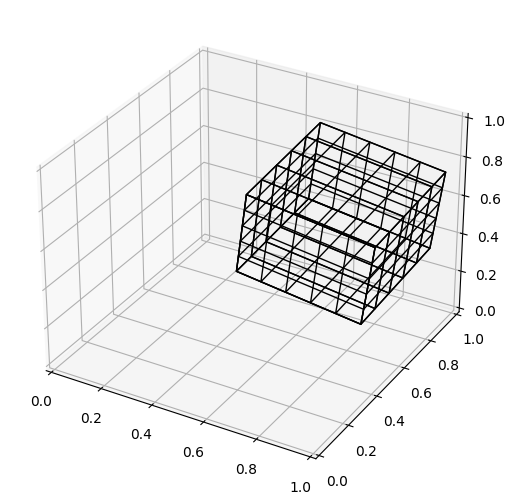

In [4]:
# Setup Camera
at = (0, 0, 0)
eye = (1, 0, 1)

eye = transformation.rotate(eye, (0, 10, 10))
print(eye)

camera = cam.get_camera(at, eye)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

edges = wireframe.cube(.5, res=.5)
# edges = transformation.translate_edges(edges, (-.2, -.2, -.2))
edges = cam.edges_to_camera(edges, camera, eye)

poly = extract_polygon(edges)

ax.add_collection3d(Poly3DCollection(poly, linewidths=1, alpha=0, edgecolors="black"))
plt.show()

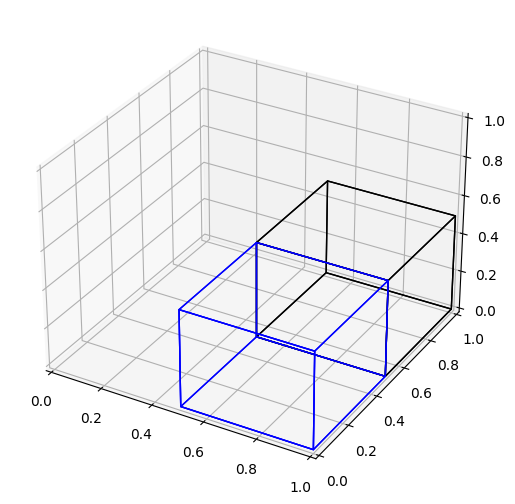

In [122]:
at = (0, 0, 0)
eye = (20, 0, 0)  # Remember, the world is scaled between 0 and 20

# eye = transformation.rotate(eye, (0, 60, 10))
camera = cam.get_camera(at, eye)

edges = wireframe.cube(.5, res=.1)
edges2 = wireframe.cube(.5, res=.1)

edges = transformation.scale_interval(edges, (0, 20))  # Camera is between 0 and 20
# edges = transformation.translate_edges(edges, (1,1 ,1 )) # There' difference betweeen transform after or before the camera
edges = cam.edges_to_camera(edges, camera, eye)
edges = transformation.scale_interval(edges, (0, 1), (0, 20))

edges2 = transformation.scale_interval(edges2, (0, 20))  # Camera is between 0 and 20
edges2 = cam.edges_to_camera(edges2, camera, eye)
edges2 = transformation.scale_interval(edges2, (0, 1), (0, 20))

edges2 = transformation.translate_edges(edges2, (0, -.5, 0))

# Transformations should be before perspective

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

poly = extract_polygon(edges)
poly2 = extract_polygon(edges2)

ax.add_collection3d(Poly3DCollection(poly, linewidths=1, alpha=0, edgecolors="black"))
ax.add_collection3d(Poly3DCollection(poly2, linewidths=1, alpha=0, edgecolors="blue"))
plt.show()

In [6]:
import camera_persp.persp as persp
from raster import *

In [28]:
# Setup Camera
at = (0, 0, 0)
eye = (10, 0, 10)

# eye = transformation.rotate(eye, (1, 1, 1))
print(eye)
camera = cam.get_camera(at, eye)

edges = wireframe.cube(.5, res=.1)

edges = transformation.scale_interval(edges, (0, 20))  # Camera is between 0 and 20
edges = cam.edges_to_camera(edges, camera, eye)
edges = transformation.scale_interval(edges, (-1, 1), (0, 20))  # The raster representation is between -1 and 1

# Trans
# edges = transformation.rotate_edges(edges, (0, 0, 0))
# edges = transformation.translate_edges(edges, (0, 0, 0))
# edges = transformation.scale_edges(edges, (1, 1, 1))
edges[:5]


(10, 0, 10)


[((0.0, -1.0, -1.0), (0.0, -1.7071067811865475, -1.7071067811865475)),
 ((0.0, -1.7071067811865475, -1.7071067811865475),
  (1.0, -1.7071067811865475, -1.7071067811865475)),
 ((1.0, -1.7071067811865475, -1.7071067811865475), (1.0, -1.0, -1.0)),
 ((1.0, -1.0, -1.0), (0.0, -1.0, -1.0)),
 ((0.0, -0.29289321881345254, -1.7071067811865475),
  (0.0, -1.0, -2.414213562373095))]

Shape: 28 2


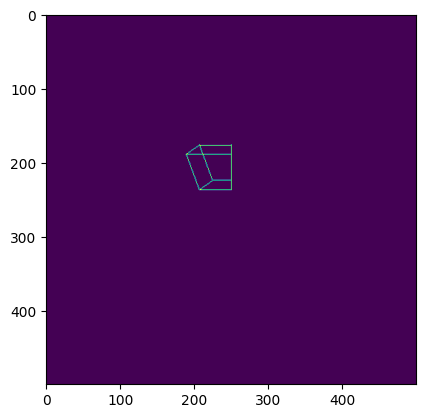

In [29]:
scale_x, scale_y = (500, 500)
scale = (scale_x, scale_y)

new_edges = persp.perspective_edges(edges, eye, scale)
# new_edges = edges
print("Shape:", len(new_edges), len(new_edges[0]))

mx = [[0 for _ in range(scale_x)] for _ in range(scale_y)]
pts = draw_edge_list(new_edges, scale)
insert_points(mx, pts)

plt.imshow(convert_img(mx))
plt.show()


## Everything together

Shape: 28 2


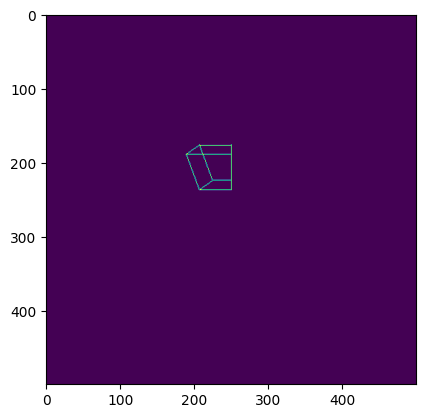

In [73]:
# Setup Camera
at = (0, 0, 0)
eye = (10, 0, 10)

# eye = transformation.rotate(eye, (1, 1, 1))
camera = cam.get_camera(at, eye)

edges = wireframe.cube(.5, res=.1)

edges = transformation.scale_interval(edges, (0, 20))  # Camera is between 0 and 20
edges = cam.edges_to_camera(edges, camera, eye)
edges = transformation.scale_interval(edges, (-1, 1), (0, 20))  # The raster representation is between -1 and 1

# Trans
edges = transformation.rotate_edges(edges, (0, 0, 0))
edges = transformation.translate_edges(edges, (0, 0, 0))
edges = transformation.scale_edges(edges, (1, 1, 1))

scale_x, scale_y = (500, 500)
scale = (scale_x, scale_y)

new_edges = persp.perspective_edges(edges, eye, scale)
# new_edges = edges
print("Shape:", len(new_edges), len(new_edges[0]))

mx = [[0 for _ in range(scale_x)] for _ in range(scale_y)]
pts = draw_edge_list(new_edges, scale)
insert_points(mx, pts)

plt.imshow(convert_img(mx))
plt.show()

Shape: 44 2


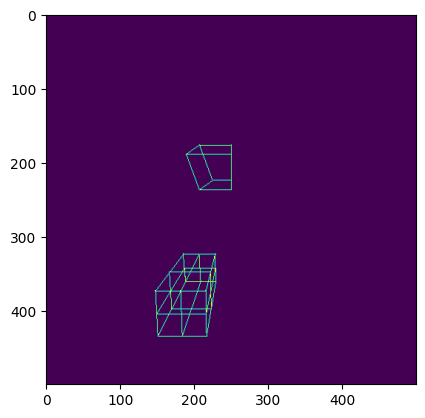

In [140]:
# Setup Camera
at = (0, 0, 0)
eye = (10, 0, 10)

# eye = transformation.rotate(eye, (1, 1, 1))
camera = cam.get_camera(at, eye)

# Cube 01
edges = wireframe.cube(.5, res=.2)

# Trans 01
edges = transformation.rotate_edges(edges, (0, 0, 0))
edges = transformation.translate_edges(edges, (0, 0, 0))
edges = transformation.scale_edges(edges, (1, 1, 1))

# Add to Camera
edges = transformation.scale_interval(edges, (0, 20))  # Camera is between 0 and 20
edges = cam.edges_to_camera(edges, camera, eye)
edges = transformation.scale_interval(edges, (-1, 1), (0, 20))  # The raster representation is between -1 and 1

# Cube 02
edges2 = wireframe.cube(.5, res=.1)

# Trans 02
edges = transformation.translate_edges(edges, (.5, 1, -2))

edges = transformation.translate_edges(edges, (.5, .5, .5))
# edges = transformation.rotate_edges(edges, (50, 0, 0))
edges = transformation.translate_edges(edges, (-.5, -.5, -.5))
edges = transformation.scale_edges(edges, (1, 1, 1))

# Add to camera 02
edges2 = transformation.scale_interval(edges2, (0, 20))  # Camera is between 0 and 20
edges2 = cam.edges_to_camera(edges2, camera, eye)
edges2 = transformation.scale_interval(edges2, (-1, 1), (0, 20))  # The raster representation is between -1 and 1


new_edges = persp.perspective_edges(edges, eye, scale)
new_edges2 = persp.perspective_edges(edges2, eye, scale)

scale_x, scale_y = (500, 500)
scale = (scale_x, scale_y)

# new_edges = edges
print("Shape:", len(new_edges), len(new_edges[0]))

mx = [[0 for _ in range(scale_x)] for _ in range(scale_y)]
pts = draw_edge_list(new_edges, scale)
pts2 = draw_edge_list(new_edges2, scale)
insert_points(mx, pts)
insert_points(mx, pts2)

plt.imshow(convert_img(mx))
plt.show()

## Better coded:

In [ ]:
def convert_to_camera(edges, camera, eye):
    edges = transformation.scale_interval(edges, (0, 20))  # Camera is between 0 and 20
    edges = cam.edges_to_camera(edges, camera, eye)
    edges = transformation.scale_interval(edges, (-1, 1), (0, 20))  # The raster representation is between -1 and 1
    return edges